In [7]:
import numpy as np
import pandas as pd


In [8]:
df = pd.read_csv('Sacramentorealestatetransactions.csv')
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


                                 street state  beds  baths  sq__ft  \
City       Zipcode                                                   
SACRAMENTO 95838           3526 HIGH ST    CA     2      1     836   
           95823            51 OMAHA CT    CA     3      1    1167   
           95815         2796 BRANCH ST    CA     2      1     796   
           95815       2805 JANETTE WAY    CA     2      1     852   
           95824        6001 MCMAHON DR    CA     2      1     797   
           95841     5828 PEPPERMILL CT    CA     3      1    1122   
           95842    6048 OGDEN NASH WAY    CA     3      2    1104   
           95820          2561 19TH AVE    CA     3      1    1177   

                           type                     sale_date  price  \
City       Zipcode                                                     
SACRAMENTO 95838    Residential  Wed May 21 00:00:00 EDT 2008  59222   
           95823    Residential  Wed May 21 00:00:00 EDT 2008  68212   
           

<Axes: xlabel='City,Zipcode'>

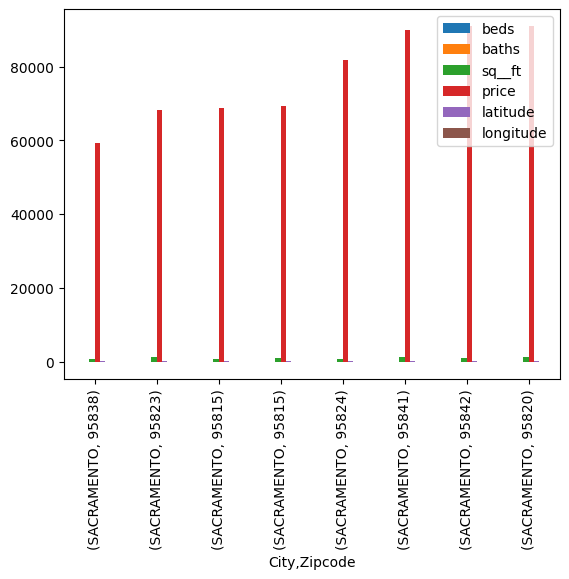

In [9]:
df.set_index(['city', 'zip'], inplace=True)

df.index.names = ['City', 'Zipcode']

print(df.head(8))

df[:8].plot(kind='bar')

In [10]:
stacked = df.stack()

print(stacked.head(8))

df = df.loc[~df.index.duplicated(keep='first')]

unstacked = df.unstack()

print(unstacked.head(8))

City        Zipcode           
SACRAMENTO  95838    street                       3526 HIGH ST
                     state                                  CA
                     beds                                    2
                     baths                                   1
                     sq__ft                                836
                     type                          Residential
                     sale_date    Wed May 21 00:00:00 EDT 2008
                     price                               59222
dtype: object
                       street                                          \
Zipcode                 95603              95608                95610   
City                                                                    
ANTELOPE                  NaN                NaN                  NaN   
AUBURN           1740 HIGH ST                NaN                  NaN   
CAMERON PARK              NaN                NaN                  NaN   
CARMICHAEL   

In [11]:
df2 = df[['state', 'street', 'beds', 'baths', 'sale_date']].set_index(['state', 'street'])

df2.index.names = ['State', 'Street']

print(df2.head(8))
df2.index.names = ['City', 'Zipcode']

print(df2.head(8))
df2.index.names = ['City', 'Zipcode']

print(df2.head(8))

                                       beds  baths  \
State Street                                         
CA    3526 HIGH ST                        2      1   
      51 OMAHA CT                         3      1   
      2796 BRANCH ST                      2      1   
      6001 MCMAHON DR                     2      1   
      5828 PEPPERMILL CT                  3      1   
      6048 OGDEN NASH WAY                 3      2   
      2561 19TH AVE                       3      1   
      11150 TRINITY RIVER DR Unit 114     2      2   

                                                          sale_date  
State Street                                                         
CA    3526 HIGH ST                     Wed May 21 00:00:00 EDT 2008  
      51 OMAHA CT                      Wed May 21 00:00:00 EDT 2008  
      2796 BRANCH ST                   Wed May 21 00:00:00 EDT 2008  
      6001 MCMAHON DR                  Wed May 21 00:00:00 EDT 2008  
      5828 PEPPERMILL CT               

In [12]:
df3 = df2.copy()

df2_reset = df2.reset_index()
df3_reset = df3.reset_index()

merged_df = pd.merge(df2_reset, df3_reset, on=['City', 'Zipcode'])

merged_df.set_index(['City', 'Zipcode'], inplace=True)

print(merged_df.head())

                         beds_x  baths_x                   sale_date_x  \
City Zipcode                                                             
CA   3526 HIGH ST             2        1  Wed May 21 00:00:00 EDT 2008   
     51 OMAHA CT              3        1  Wed May 21 00:00:00 EDT 2008   
     2796 BRANCH ST           2        1  Wed May 21 00:00:00 EDT 2008   
     6001 MCMAHON DR          2        1  Wed May 21 00:00:00 EDT 2008   
     5828 PEPPERMILL CT       3        1  Wed May 21 00:00:00 EDT 2008   

                         beds_y  baths_y                   sale_date_y  
City Zipcode                                                            
CA   3526 HIGH ST             2        1  Wed May 21 00:00:00 EDT 2008  
     51 OMAHA CT              3        1  Wed May 21 00:00:00 EDT 2008  
     2796 BRANCH ST           2        1  Wed May 21 00:00:00 EDT 2008  
     6001 MCMAHON DR          2        1  Wed May 21 00:00:00 EDT 2008  
     5828 PEPPERMILL CT       3        1  W